In [2]:
!pip install seaborn

In [2]:
df.describe()
df.isna().sum()


Poster_Link        0
Series_Title       0
Released_Year      1
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
Main_Genre         0
dtype: int64

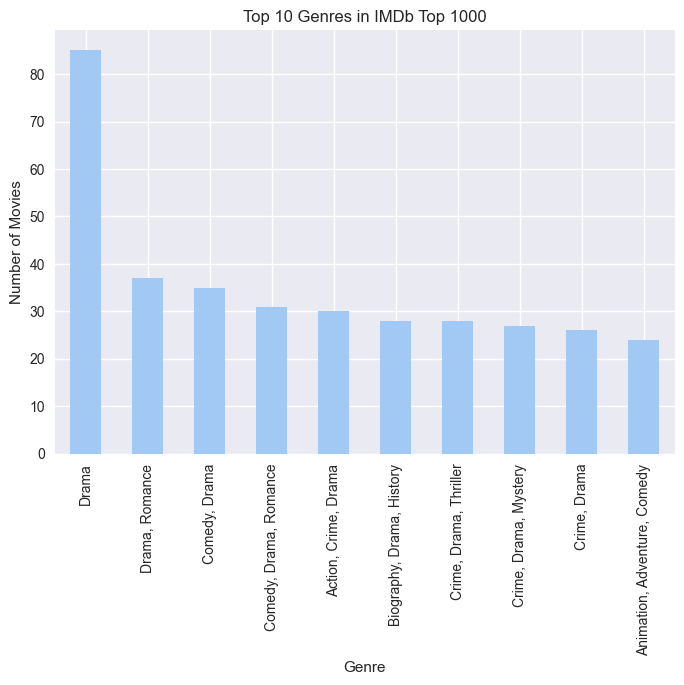

In [7]:
df['Genre'].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Genres in IMDb Top 1000")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

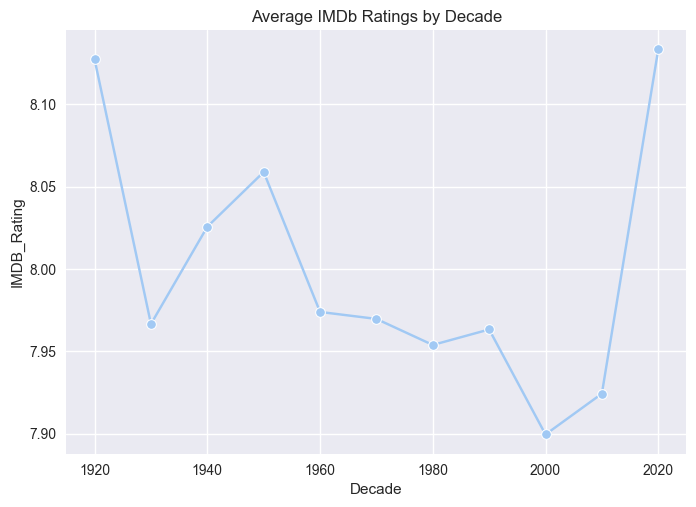

In [8]:
df['Decade'] = (df['Released_Year'] // 10) * 10
avg_ratings = df.groupby('Decade')['IMDB_Rating'].mean().reset_index()

sns.lineplot(x="Decade", y="IMDB_Rating", data=avg_ratings, marker="o")
plt.title("Average IMDb Ratings by Decade")
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")
df = pd.read_csv("../data/imdb_top_1000_newclean.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Main_Genre
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather Part II,1974.0,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime


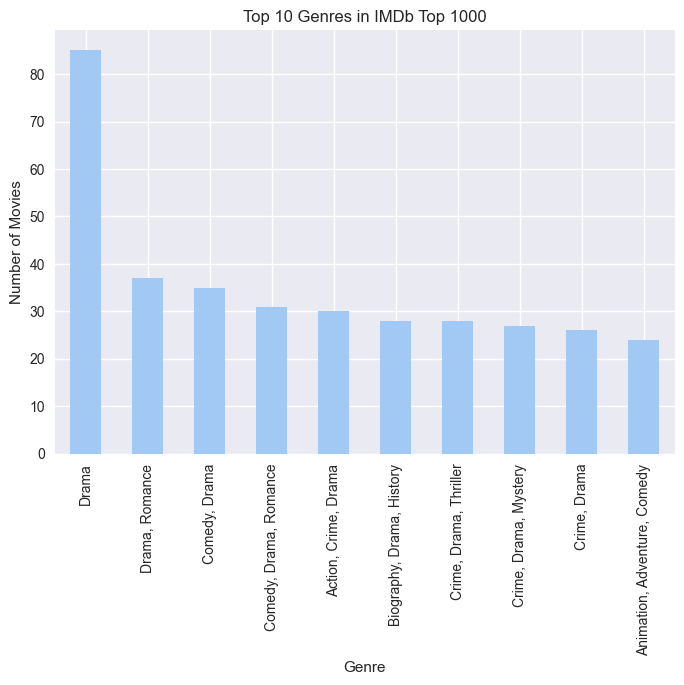

In [4]:
df['Genre'].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Genres in IMDb Top 1000")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

In [10]:
df['Decade'] = (df['Released_Year'] // 10) * 10

In [13]:
decade_genre = df.groupby(['Decade','Genre'])['IMDB_Rating'].mean().reset_index()

In [14]:
top_genres = decade_genre.loc[decade_genre.groupby('Decade')['IMDB_Rating'].idxmax()]

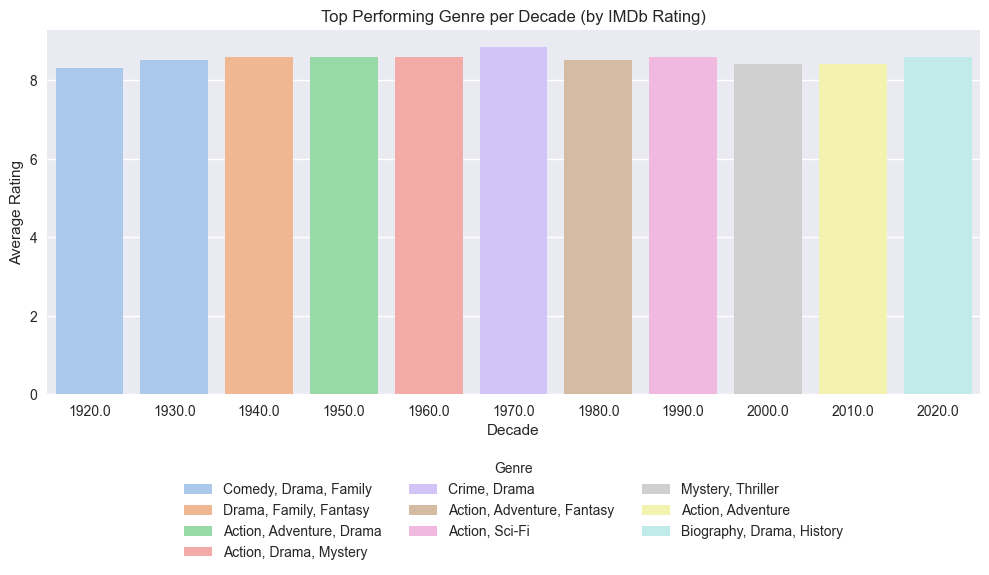

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_genres, x='Decade', y='IMDB_Rating', hue='Genre')
plt.title("Top Performing Genre per Decade (by IMDb Rating)")
plt.ylabel("Average Rating")

plt.legend(title='Genre', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.savefig("../images/Top_Perfoming_Genre_Per_Decade.png")
plt.show()

In [1]:
df['Decade'] = (df['Released_Year'] // 10) * 10

ratings_by_decade = df.groupby('Decade')['IMDB_Rating'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=ratings_by_decade, x='Decade', y='IMDB_Rating', marker='o')
plt.title("Average IMDb Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.grid(True)
plt.savefig("../images/top_genres_by_decade.png", bbox_inches="tight", dpi=300)
plt.show()


NameError: name 'df' is not defined

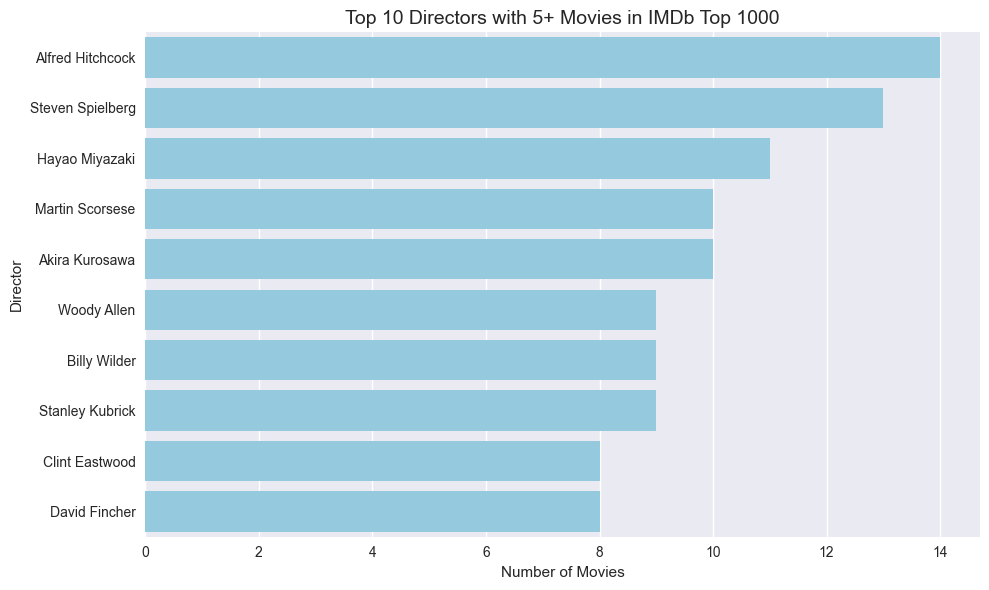

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

director_stats = df.groupby('Director').agg(
    Movie_Count=('Series_Title', 'count'),
    Avg_Rating=('IMDB_Rating', 'mean')
).reset_index()

director_stats = director_stats[director_stats['Movie_Count'] >= 5]


top_directors = director_stats.sort_values(by='Movie_Count', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_directors, 
    y='Director', 
    x='Movie_Count', 
    color='skyblue'  # uniform color
)
plt.title("Top 10 Directors with 5+ Movies in IMDb Top 1000", fontsize=14)
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.tight_layout()

plt.savefig("../images/top_directors.png", bbox_inches="tight", dpi=300)
plt.show()


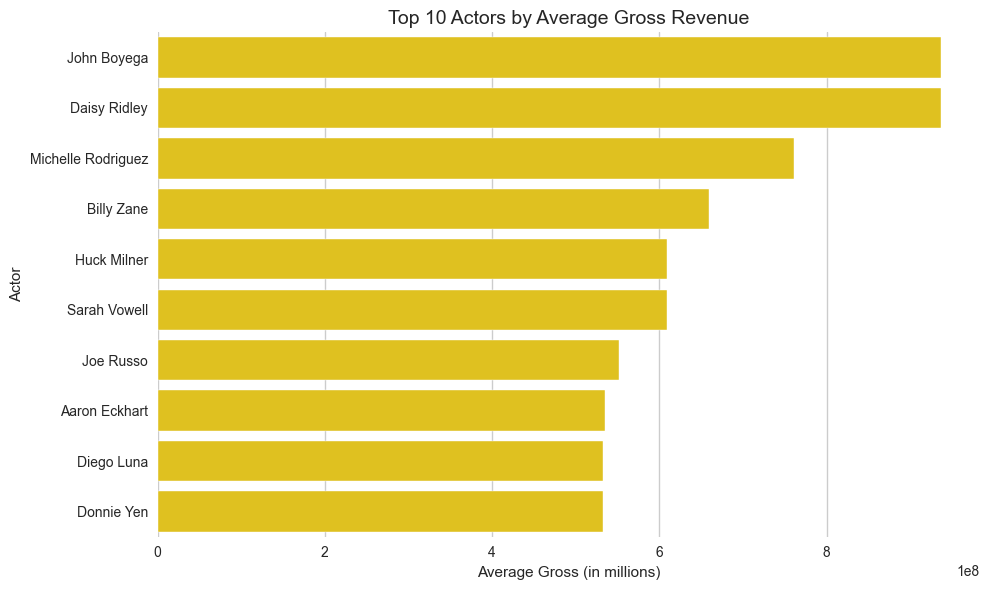

In [32]:
actors = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])
actors = actors.value_counts().reset_index()
actors.columns = ['Actor', 'Movie_Count']

actor_gross = pd.concat([
    df[['Star1', 'Gross']].rename(columns={'Star1': 'Actor'}),
    df[['Star2', 'Gross']].rename(columns={'Star2': 'Actor'}),
    df[['Star3', 'Gross']].rename(columns={'Star3': 'Actor'}),
    df[['Star4', 'Gross']].rename(columns={'Star4': 'Actor'})
])

actor_gross = actor_gross.groupby('Actor')['Gross'].mean().reset_index()
top_actors = actor_gross.sort_values(by='Gross', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_actors, y='Actor', x='Gross', color='gold')
plt.title("Top 10 Actors by Average Gross Revenue", fontsize=14)
plt.xlabel("Average Gross (in millions)")
plt.ylabel("Actor")
plt.tight_layout()
plt.savefig("../images/top_actors_by_gross.png", bbox_inches="tight", dpi=300)
plt.show()
